In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scanpy as sc
import paste as pst
import pandas as pd
import anndata as ad
import time

simulate

In [2]:
dirs="/data02/tguo/space_batch_effect/simulate/"
batch_sim="_1"
types="_types2"
feat1=sc.read_csv(dirs+"gtt_input/feat1"+str(batch_sim)+types+".csv")
meta1=pd.read_csv(dirs+"gtt_input/meta1"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
coord1=pd.read_csv(dirs+"gtt_input/coord1"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
coord1=coord1.loc[:,['x','y']]
feat2=sc.read_csv(dirs+"gtt_input/feat2"+str(batch_sim)+types+".csv")
meta2=pd.read_csv(dirs+"gtt_input/meta2"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
coord2=pd.read_csv(dirs+"gtt_input/coord2"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
coord2=coord2.loc[:,['x','y']]
feat1.obsm['spatial'] = coord1.values
feat1.obs['celltype']=meta1.iloc[:,0].values
feat2.obsm['spatial'] = coord2.values
feat2.obs['celltype']=meta2.iloc[:,0].values

# feat3=sc.read_csv(dirs+"gtt_input/feat3"+str(batch_sim)+types+".csv")
# meta3=pd.read_csv(dirs+"gtt_input/meta3"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
# coord3=pd.read_csv(dirs+"gtt_input/coord3"+str(batch_sim)+types+".csv",header=0,index_col=0,sep=',')
# coord3=coord3.loc[:,['x','y']]
# feat3.obsm['spatial'] = coord3.values
# feat3.obs['celltype']=meta3.iloc[:,0].values

# pi12 = pst.pairwise_align(feat1, feat2)
# pi23 = pst.pairwise_align(feat2, feat3)
# slices, pis = [feat1, feat2,feat3], [pi12, pi23]
# new_slices = pst.stack_slices_pairwise(slices, pis)
# new_slices[0].obs=meta1
# new_slices[1].obs=meta2
# new_slices[2].obs=meta3
# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial'],
#                    new_slices[2].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names))
# new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
# new_coord.to_csv(dirs+"methods/paste_new_coord"+batch_sim+types+".csv")


pi12 = pst.pairwise_align(feat1, feat2)
slices, pis = [feat1, feat2], [pi12]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1
new_slices[1].obs=meta2
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(dirs+"methods/paste_new_coord"+batch_sim+types+".csv")

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


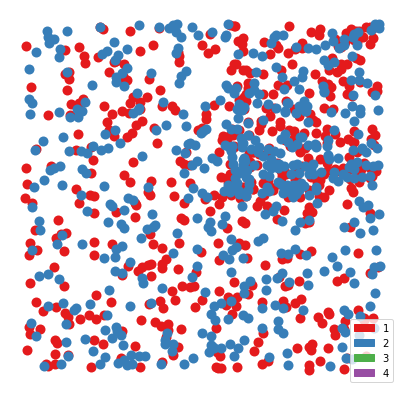

In [8]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()
# sc.pl.spatial(new_slices[0], color = "celltype", spot_size = 0.1)
# sc.pl.spatial(feat1, color = "celltype", spot_size = 0.1)
# sc.pl.spatial(new_slices[1], color = "celltype", spot_size = 0.1)
# sc.pl.spatial(feat2, color = "celltype", spot_size = 0.1)

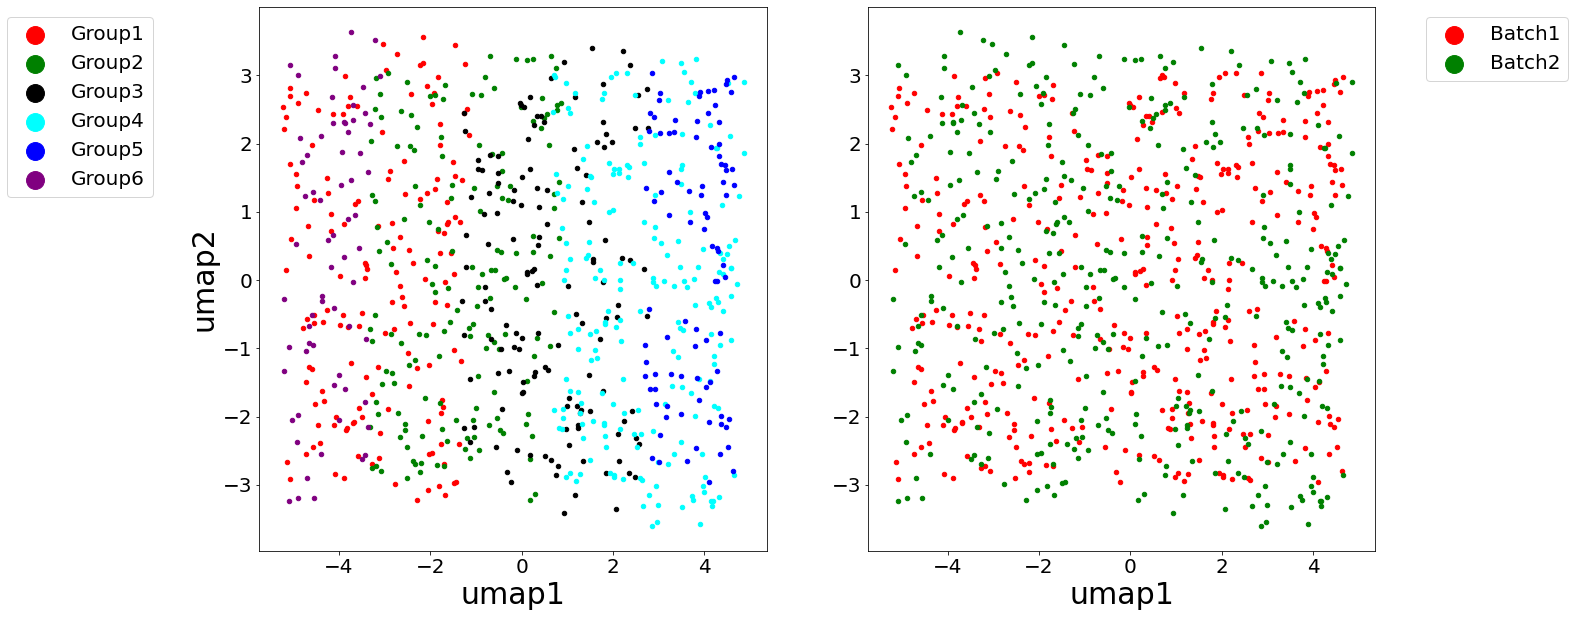

In [17]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array(['Batch1']*feat1.n_obs+['Batch2']*feat2.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour1=['r','g','black','cyan','blue','purple','grey']
# colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
#        'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [9]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype']),
                    np.array(new_slices[2].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array(['Batch1']*feat1.n_obs+['Batch2']*feat2.n_obs+['Batch3']*feat3.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                   new_slices[2].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour1=['r','g','black','cyan','blue','purple','grey']
# colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
#        'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

IndexError: list index out of range

In [27]:
#####center slices#####
feats=[feat1,feat2]
initial_slice = ad.concat(feats)
lmbda = len(feats)*[1/len(feats)]
b = []
for i in range(len(feats)):
    b.append(pst.match_spots_using_spatial_heuristic(feats[0].X, feats[i].X))
import time
start = time.time()

# center_slice, pis = pst.center_align(initial_slice, feats, lmbda, random_seed = 5, pis_init = b)
center_slice, pis = pst.center_align(initial_slice, feats, lmbda, random_seed = 5)

print('Runtime: ' + str(time.time() - start))
center, new_slices = pst.stack_slices_center(center_slice, feats, pis)

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Filtered all slices for common genes. There are 500 common genes.


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Iteration: 0
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/paste/PASTE.py:285: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  center_slice = AnnData(np.dot(W,H))


Objective  0.30988613003333676
Difference: 0.30988613003333676

Iteration: 1
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/paste/PASTE.py:285: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  center_slice = AnnData(np.dot(W,H))


Objective  0.29223485337905014
Difference: 0.01765127665428662

Iteration: 2
Solving Pairwise Slice Alignment Problem.
Solving Center Mapping NMF Problem.
Objective  0.29162899552316945
Difference: 0.0006058578558806871

Runtime: 13.411417007446289


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


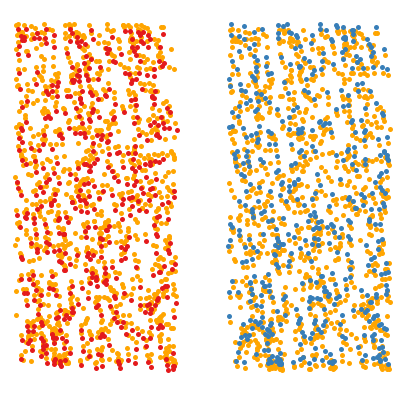

In [28]:
center_color = 'orange'
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(1, 2,figsize=(7,7))
pst.plot_slice(center,center_color,ax=axs[0])
pst.plot_slice(new_slices[0],slice_colors[0],ax=axs[0])

pst.plot_slice(center,center_color,ax=axs[1])
pst.plot_slice(new_slices[1],slice_colors[1],ax=axs[1])

In [18]:
a=meta1.iloc[np.where(pi12>0)[0],:]
b=meta2.iloc[np.where(pi12>0)[1],:]
a1=a.iloc[np.where(a.iloc[:,0].values!=b.iloc[:,0].values)[0],:].values
b1=b.iloc[np.where(a.iloc[:,0].values!=b.iloc[:,0].values)[0],:].values
print(np.unique(a1[:,0]))
print(np.unique(b1[:,0]))

['Group1' 'Group2' 'Group4' 'Group6']
['Group2' 'Group3' 'Group5']


DLPFC

In [45]:
dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# samples=['151507','151509']
samples=np.array(['151507','151508','151509','151510','151669','151670','151671','151672','151673','151674','151675','151676'])
samples=samples[[0,4,8]]
flags=""
for i in samples:
    flags=flags+"_"+i
flags1=samples[0]
for i in range(1,len(samples)):
    flags1=flags1+'-'+samples[i] 
    
feat1=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[0])+"_features.txt")
meta1=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[0])+"_label.txt",header=0,index_col=0,sep=',')
coord1=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[0])+"_positions.txt",header=0,index_col=0,sep=',')
coord1=coord1.loc[:,['x','y']]
feat2=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[1])+"_features.txt")
meta2=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[1])+"_label.txt",header=0,index_col=0,sep=',')
coord2=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[1])+"_positions.txt",header=0,index_col=0,sep=',')
coord2=coord2.loc[:,['x','y']]
feat1.obsm['spatial'] = coord1.values
feat1.obs['celltype']=meta1.iloc[:,0].values
feat2.obsm['spatial'] = coord2.values
feat2.obs['celltype']=meta2.iloc[:,0].values

# pi0=pst.match_spots_using_spatial_heuristic(feat1.obsm['spatial'],feat2.obsm['spatial'],use_ot=True)
# pi12 = pst.pairwise_align(feat1, feat2,alpha=0.1,G_init=pi0,norm=False)
# slices, pis = [feat1, feat2], [pi12]
# new_slices = pst.stack_slices_pairwise(slices, pis)
# new_slices[0].obs=meta1
# new_slices[1].obs=meta2
# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))
# new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
# new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

feat3=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[2])+"_features.txt")
meta3=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[2])+"_label.txt",header=0,index_col=0,sep=',')
coord3=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[2])+"_positions.txt",header=0,index_col=0,sep=',')
coord3=coord3.loc[:,['x','y']]
feat3.obsm['spatial'] = coord3.values
feat3.obs['celltype']=meta3.iloc[:,0].values

pi0=pst.match_spots_using_spatial_heuristic(feat1.obsm['spatial'],feat2.obsm['spatial'],use_ot=True)
pi12 = pst.pairwise_align(feat1, feat2,alpha=0.1,G_init=pi0,norm=False)
pi0=pst.match_spots_using_spatial_heuristic(feat2.obsm['spatial'],feat3.obsm['spatial'],use_ot=True)
pi23 = pst.pairwise_align(feat2, feat3,alpha=0.1,G_init=pi0,norm=False)
slices, pis = [feat1, feat2,feat3], [pi12, pi23]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1
new_slices[1].obs=meta2
new_slices[2].obs=meta3
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                   new_slices[2].obsm['spatial']))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

# feat4=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[3])+"_features.txt")
# meta4=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[3])+"_label.txt",header=0,index_col=0,sep=',')
# coord4=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[3])+"_positions.txt",header=0,index_col=0,sep=',')
# coord4=coord4.loc[:,['x','y']]
# feat4.obsm['spatial'] = coord4.values
# feat4.obs['celltype']=meta4.iloc[:,0].values

# pi0=pst.match_spots_using_spatial_heuristic(feat1.obsm['spatial'],feat2.obsm['spatial'],use_ot=True)
# pi12 = pst.pairwise_align(feat1, feat2,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat2.obsm['spatial'],feat3.obsm['spatial'],use_ot=True)
# pi23 = pst.pairwise_align(feat2, feat3,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat3.obsm['spatial'],feat4.obsm['spatial'],use_ot=True)
# pi34 = pst.pairwise_align(feat3, feat4,alpha=0.1,G_init=pi0,norm=False)
# slices, pis = [feat1, feat2,feat3,feat4], [pi12, pi23,pi34]
# new_slices = pst.stack_slices_pairwise(slices, pis)
# new_slices[0].obs=meta1
# new_slices[1].obs=meta2
# new_slices[2].obs=meta3
# new_slices[3].obs=meta4
# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial'],
#                    new_slices[2].obsm['spatial'],
#                    new_slices[3].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names,new_slices[3].obs_names))
# new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
# new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")
# feat5=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[4])+"_features.txt")
# meta5=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[4])+"_label.txt",header=0,index_col=0,sep=',')
# coord5=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[4])+"_positions.txt",header=0,index_col=0,sep=',')
# coord5=coord5.loc[:,['x','y']]
# feat5.obsm['spatial'] = coord5.values
# feat5.obs['celltype']=meta5.iloc[:,0].values
# feat6=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[5])+"_features.txt")
# meta6=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[5])+"_label.txt",header=0,index_col=0,sep=',')
# coord6=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[5])+"_positions.txt",header=0,index_col=0,sep=',')
# coord6=coord6.loc[:,['x','y']]
# feat6.obsm['spatial'] = coord6.values
# feat6.obs['celltype']=meta6.iloc[:,0].values
# feat7=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[6])+"_features.txt")
# meta7=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[6])+"_label.txt",header=0,index_col=0,sep=',')
# coord7=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[6])+"_positions.txt",header=0,index_col=0,sep=',')
# coord7=coord7.loc[:,['x','y']]
# feat7.obsm['spatial'] = coord7.values
# feat7.obs['celltype']=meta7.iloc[:,0].values
# feat8=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[7])+"_features.txt")
# meta8=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[7])+"_label.txt",header=0,index_col=0,sep=',')
# coord8=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[7])+"_positions.txt",header=0,index_col=0,sep=',')
# coord8=coord8.loc[:,['x','y']]
# feat8.obsm['spatial'] = coord8.values
# feat8.obs['celltype']=meta8.iloc[:,0].values
# feat9=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[8])+"_features.txt")
# meta9=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[8])+"_label.txt",header=0,index_col=0,sep=',')
# coord9=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[8])+"_positions.txt",header=0,index_col=0,sep=',')
# coord9=coord9.loc[:,['x','y']]
# feat9.obsm['spatial'] = coord9.values
# feat9.obs['celltype']=meta9.iloc[:,0].values
# feat10=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[9])+"_features.txt")
# meta10=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[9])+"_label.txt",header=0,index_col=0,sep=',')
# coord10=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[9])+"_positions.txt",header=0,index_col=0,sep=',')
# coord10=coord10.loc[:,['x','y']]
# feat10.obsm['spatial'] = coord10.values
# feat10.obs['celltype']=meta10.iloc[:,0].values
# feat11=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[10])+"_features.txt")
# meta11=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[10])+"_label.txt",header=0,index_col=0,sep=',')
# coord11=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[10])+"_positions.txt",header=0,index_col=0,sep=',')
# coord11=coord11.loc[:,['x','y']]
# feat11.obsm['spatial'] = coord11.values
# feat11.obs['celltype']=meta11.iloc[:,0].values
# feat12=sc.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[11])+"_features.txt")
# meta12=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[11])+"_label.txt",header=0,index_col=0,sep=',')
# coord12=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[11])+"_positions.txt",header=0,index_col=0,sep=',')
# coord12=coord12.loc[:,['x','y']]
# feat12.obsm['spatial'] = coord12.values
# feat12.obs['celltype']=meta12.iloc[:,0].values

# pi0=pst.match_spots_using_spatial_heuristic(feat1.obsm['spatial'],feat2.obsm['spatial'],use_ot=True)
# pi12 = pst.pairwise_align(feat1, feat2,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat2.obsm['spatial'],feat3.obsm['spatial'],use_ot=True)
# pi23 = pst.pairwise_align(feat2, feat3,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat3.obsm['spatial'],feat4.obsm['spatial'],use_ot=True)
# pi34 = pst.pairwise_align(feat3, feat4,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat4.obsm['spatial'],feat5.obsm['spatial'],use_ot=True)
# pi45 = pst.pairwise_align(feat4, feat5,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat5.obsm['spatial'],feat6.obsm['spatial'],use_ot=True)
# pi56 = pst.pairwise_align(feat5, feat6,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat6.obsm['spatial'],feat7.obsm['spatial'],use_ot=True)
# pi67 = pst.pairwise_align(feat6, feat7,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat7.obsm['spatial'],feat8.obsm['spatial'],use_ot=True)
# pi78 = pst.pairwise_align(feat7, feat8,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat8.obsm['spatial'],feat9.obsm['spatial'],use_ot=True)
# pi89 = pst.pairwise_align(feat8, feat9,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat9.obsm['spatial'],feat10.obsm['spatial'],use_ot=True)
# pi910 = pst.pairwise_align(feat9, feat10,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat10.obsm['spatial'],feat11.obsm['spatial'],use_ot=True)
# pi1011 = pst.pairwise_align(feat10, feat11,alpha=0.1,G_init=pi0,norm=False)
# pi0=pst.match_spots_using_spatial_heuristic(feat11.obsm['spatial'],feat12.obsm['spatial'],use_ot=True)
# pi1112 = pst.pairwise_align(feat11, feat12,alpha=0.1,G_init=pi0,norm=False)

# slices, pis = [feat1, feat2,feat3,feat4,feat5, feat6,feat7,feat8,feat9, feat10,feat11,feat12], [pi12, pi23,pi34,pi45, pi56,pi67,pi78, pi89,pi910,pi1011, pi1112]
# new_slices = pst.stack_slices_pairwise(slices, pis)
# new_slices[0].obs=meta1
# new_slices[1].obs=meta2
# new_slices[2].obs=meta3
# new_slices[3].obs=meta4
# new_slices[4].obs=meta5
# new_slices[5].obs=meta6
# new_slices[6].obs=meta7
# new_slices[7].obs=meta8
# new_slices[8].obs=meta9
# new_slices[9].obs=meta10
# new_slices[10].obs=meta11
# new_slices[11].obs=meta12
# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial'],
#                    new_slices[2].obsm['spatial'],
#                    new_slices[3].obsm['spatial'],
#                     new_slices[4].obsm['spatial'],
#                     new_slices[5].obsm['spatial'],
#                    new_slices[6].obsm['spatial'],
#                    new_slices[7].obsm['spatial'],
#                     new_slices[8].obsm['spatial'],
#                     new_slices[9].obsm['spatial'],
#                    new_slices[10].obsm['spatial'],
#                    new_slices[11].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names,new_slices[3].obs_names,
#                 new_slices[4].obs_names,new_slices[5].obs_names,new_slices[6].obs_names,new_slices[7].obs_names,
#                 new_slices[8].obs_names,new_slices[9].obs_names,new_slices[10].obs_names,new_slices[11].obs_names))
# new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
# new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INAC

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


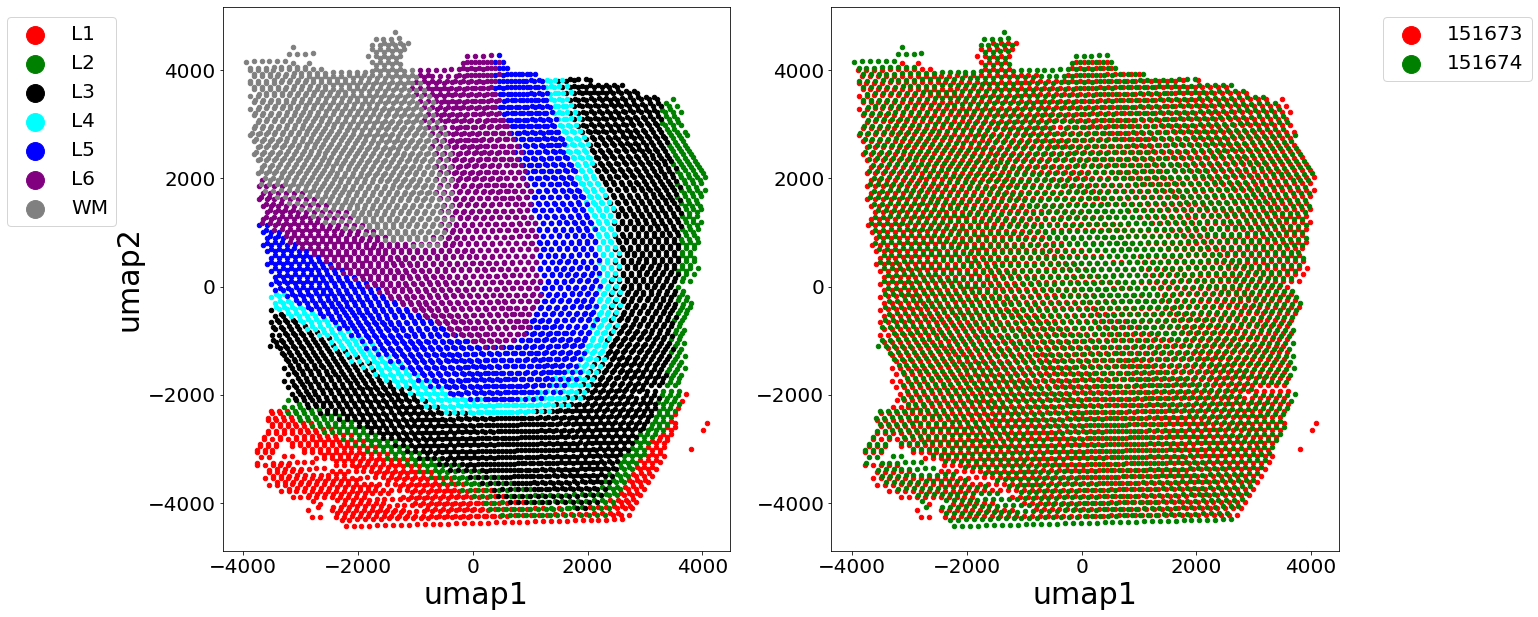

In [38]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour1=['r','g','black','cyan','blue','purple','grey']
# colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
#        'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

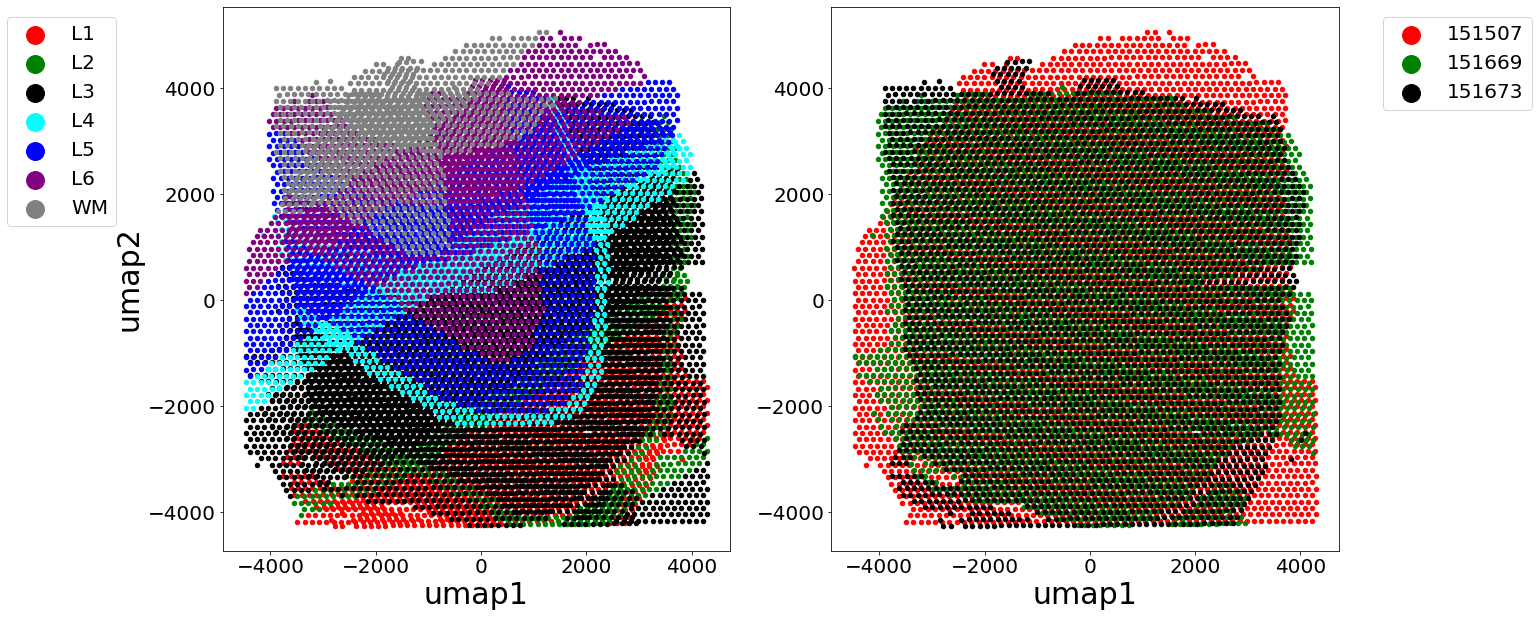

In [46]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype']),
                    np.array(new_slices[2].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs+[samples[2]]*feat3.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                    new_slices[2].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour1=['r','g','black','cyan','blue','purple','grey']
# colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
#        'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

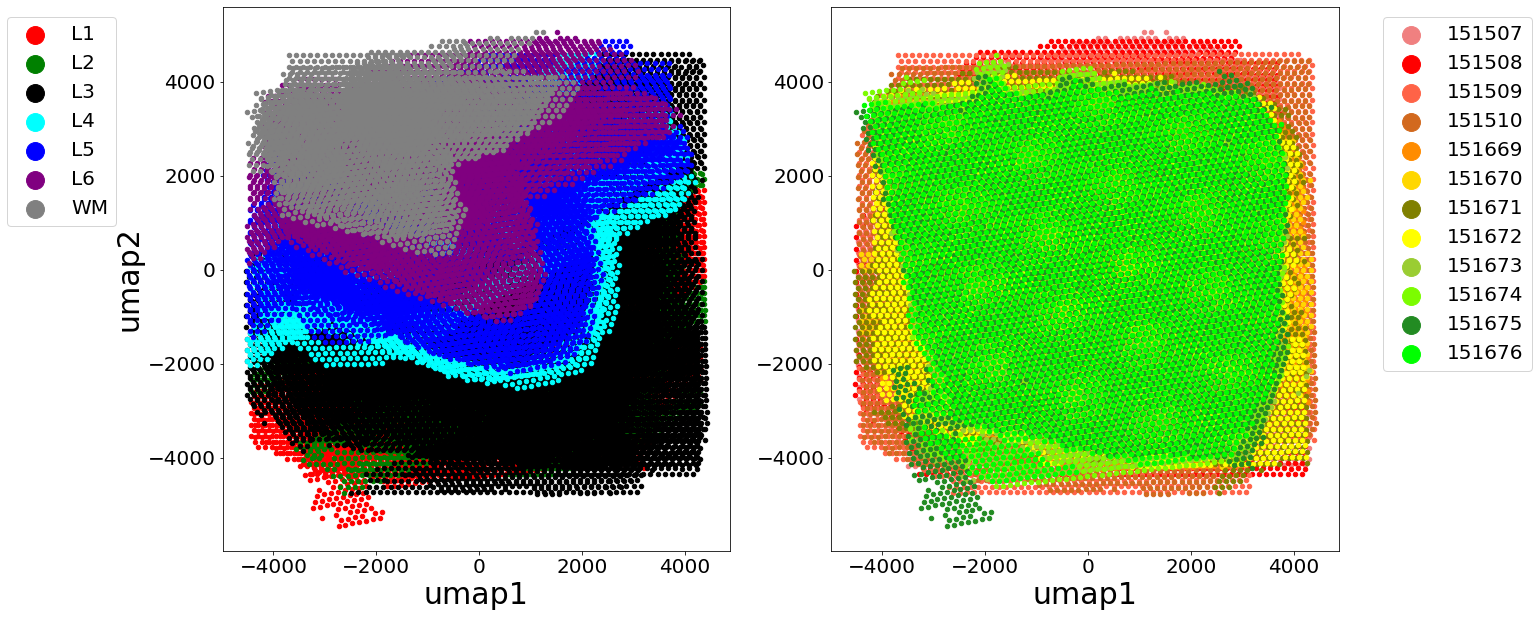

In [44]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype']),
                    np.array(new_slices[2].obs['celltype']),
                    np.array(new_slices[3].obs['celltype']),
                   np.array(new_slices[4].obs['celltype']),
                    np.array(new_slices[5].obs['celltype']),
                    np.array(new_slices[6].obs['celltype']),
                    np.array(new_slices[7].obs['celltype']),
                   np.array(new_slices[8].obs['celltype']),
                    np.array(new_slices[9].obs['celltype']),
                    np.array(new_slices[10].obs['celltype']),
                    np.array(new_slices[11].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs+[samples[2]]*feat3.n_obs+[samples[3]]*feat4.n_obs+
              [samples[4]]*feat5.n_obs+[samples[5]]*feat6.n_obs+[samples[6]]*feat7.n_obs+[samples[7]]*feat8.n_obs+
              [samples[8]]*feat9.n_obs+[samples[9]]*feat10.n_obs+[samples[10]]*feat11.n_obs+[samples[11]]*feat12.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                   new_slices[2].obsm['spatial'],
                   new_slices[3].obsm['spatial'],
                   new_slices[4].obsm['spatial'],
                    new_slices[5].obsm['spatial'],
                   new_slices[6].obsm['spatial'],
                   new_slices[7].obsm['spatial'],
                   new_slices[8].obsm['spatial'],
                    new_slices[9].obsm['spatial'],
                   new_slices[10].obsm['spatial'],
                   new_slices[11].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [15]:
######center#######
# initial_slice = feat1.copy()
# pst.filter_for_common_genes(slices)
# b = []
# for i in range(len(slices)):
#     b.append(pst.match_spots_using_spatial_heuristic(slices[0].X, slices[i].X))
lmbda = len(slices)*[1/len(slices)]

start = time.time()
center_slice, pis = pst.center_align(initial_slice, slices, lmbda, random_seed=5)
print('Runtime: ' + str(time.time() - start))
center, new_slices = pst.stack_slices_center(center_slice, slices, pis)
center_color = 'orange'
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
pst.plot_slice(center,center_color,ax=axs[0,0])
pst.plot_slice(new_slices[0],slice_colors[0],ax=axs[0,0])

pst.plot_slice(center,center_color,ax=axs[0,1])
pst.plot_slice(new_slices[1],slice_colors[1],ax=axs[0,1])

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Filtered all slices for common genes. There are 4947 common genes.
Iteration: 0
Solving Pairwise Slice Alignment Problem.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INAC

RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is v

Solving Center Mapping NMF Problem.
Objective  10138.613826080962
Difference: 10138.613826080962

Iteration: 1
Solving Pairwise Slice Alignment Problem.


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/paste/PASTE.py:285: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  center_slice = AnnData(np.dot(W,H))
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  10138.602095076434
Difference: 0.01173100452797371

Iteration: 2
Solving Pairwise Slice Alignment Problem.


/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/paste/PASTE.py:285: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  center_slice = AnnData(np.dot(W,H))
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  10138.602095081387
Difference: 4.953108145855367e-09

Runtime: 770.0174815654755


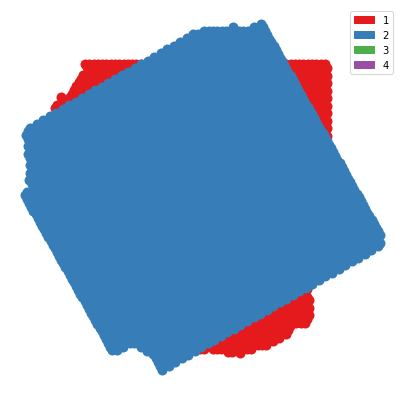

In [8]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()
# sc.pl.spatial(new_slices[0], color = "celltype", spot_size = 0.1)
# sc.pl.spatial(feat1, color = "celltype", spot_size = 0.1)
# sc.pl.spatial(new_slices[1], color = "celltype", spot_size = 0.1)
# sc.pl.spatial(feat2, color = "celltype", spot_size = 0.1)

mouse brain

In [14]:
dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# samples=["anterior1","anterior2"]
samples=["posterior1","posterior2"]
angle=30
flags=""
for i in np.arange(len(samples)):
    flags=flags+"_"+samples[i]
feat1=sc.read_csv(dirs+"gtt_input/"+samples[0]+"_mat.csv")
coord1=pd.read_csv(dirs+"gtt_input/"+samples[0]+"_coord.csv",header=0,index_col=0,sep=',')
coord1=coord1.loc[:,['x','y']]
meta1=pd.read_csv(dirs+"gtt_input/"+samples[0]+"_meta.csv",header=0,index_col=0,sep=',')
feat2=sc.read_csv(dirs+"gtt_input/"+samples[1]+"_mat.csv")
# coord2=pd.read_csv(dirs+"gtt_input/"+samples[1]+"_coord.csv",header=0,index_col=0,sep=',')
coord2=pd.read_csv(dirs+"gtt_input/"+samples[1]+"_coord_rotate"+str(angle)+".csv",header=0,index_col=0,sep=',')
coord2=coord2.loc[:,['x','y']]
meta2=pd.read_csv(dirs+"gtt_input/"+samples[1]+"_meta.csv",header=0,index_col=0,sep=',')


feat1.obsm['spatial'] = coord1.values
feat1.obs['celltype']=meta1.loc[feat1.obs_names,'celltype'].values
feat2.obsm['spatial'] = coord2.values
feat2.obs['celltype']=meta2.loc[feat2.obs_names,'celltype'].values
pi12=pst.pairwise_align(feat1, feat2)
slices, pis = [feat1, feat2], [pi12]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1
new_slices[1].obs=meta2
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+"_rotate"+str(angle)+".csv")

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INAC

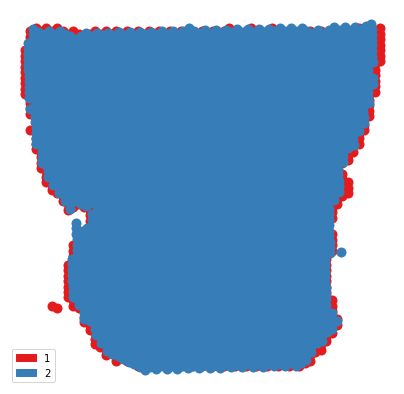

In [23]:
slices, pis = [feat1, feat2], [pi12]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1.loc[new_slices[0].obs_names,:]
new_slices[1].obs=meta2.loc[new_slices[1].obs_names,:]
slice_colors = ['#e41a1c','#377eb8']
plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

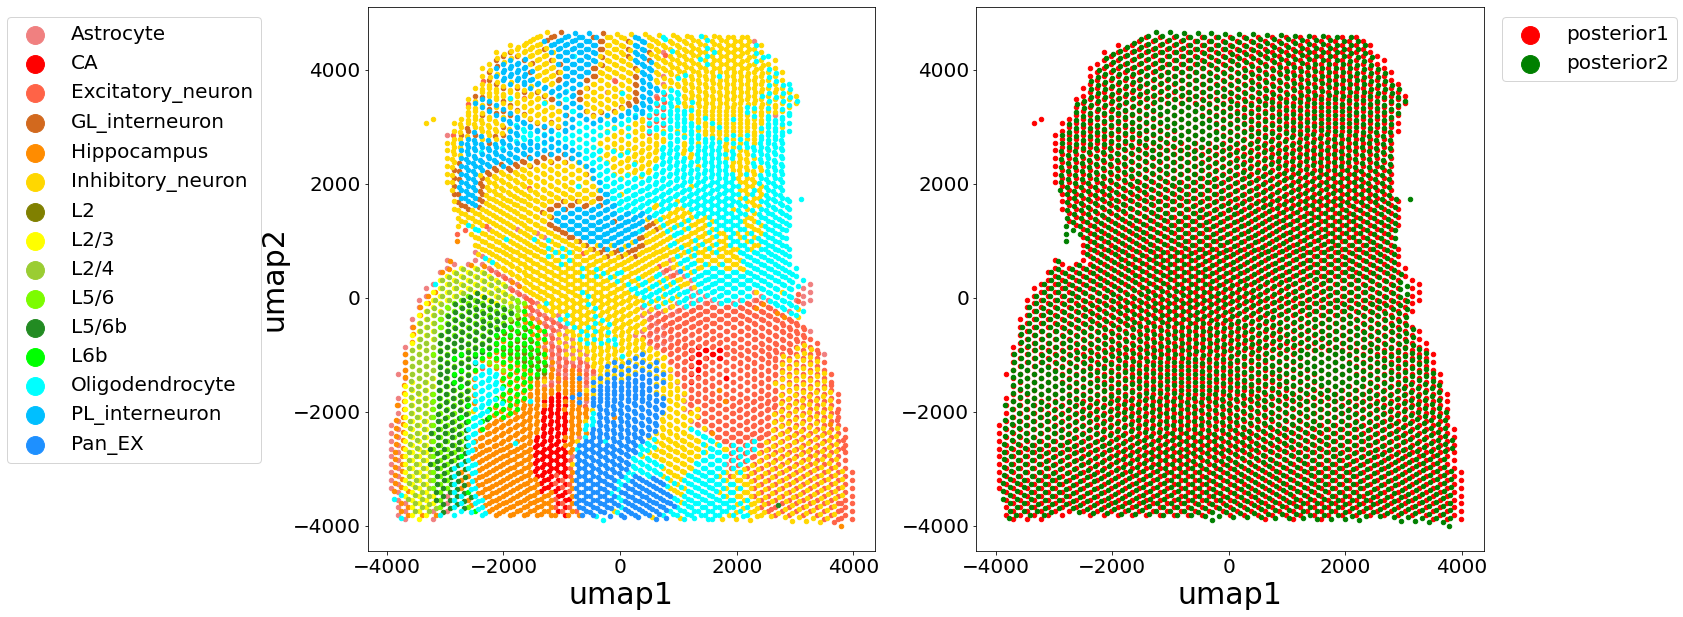

In [24]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
# umap_mat=np.vstack((feat1.obsm['spatial'],
#                     feat2.obsm['spatial']))
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
colour2=['r','g','black','cyan','blue','purple','grey']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

Hippo

In [6]:
dirs="/data02/tguo/space_batch_effect/Hippo/"
samples=["10X_Normal","10X_DAPI","10X_FFPE"]
flags=""
for i in np.arange(len(samples)):
    flags=flags+"_"+samples[i]
feat1=sc.read_csv(dirs+"gtt_input/"+samples[0]+"_mat.csv")
coord1=pd.read_csv(dirs+"gtt_input/"+samples[0]+"_coord1.csv",header=0,index_col=0,sep=',')
coord1=coord1.loc[:,['x','y']]
meta1=pd.read_csv(dirs+"gtt_input/"+samples[0]+"_meta.csv",header=0,index_col=0,sep=',')
feat2=sc.read_csv(dirs+"gtt_input/"+samples[1]+"_mat.csv")
coord2=pd.read_csv(dirs+"gtt_input/"+samples[1]+"_coord1.csv",header=0,index_col=0,sep=',')
coord2=coord2.loc[:,['x','y']]
meta2=pd.read_csv(dirs+"gtt_input/"+samples[1]+"_meta.csv",header=0,index_col=0,sep=',')
feat3=sc.read_csv(dirs+"gtt_input/"+samples[2]+"_mat.csv")
coord3=pd.read_csv(dirs+"gtt_input/"+samples[2]+"_coord1.csv",header=0,index_col=0,sep=',')
coord3=coord3.loc[:,['x','y']]
meta3=pd.read_csv(dirs+"gtt_input/"+samples[2]+"_meta.csv",header=0,index_col=0,sep=',')


feat1.obsm['spatial'] = coord1.values
feat1.obs['celltype']=meta1.loc[feat1.obs_names,'celltype'].values
feat2.obsm['spatial'] = coord2.values
feat2.obs['celltype']=meta2.loc[feat2.obs_names,'celltype'].values
feat3.obsm['spatial'] = coord3.values
feat3.obs['celltype']=meta3.loc[feat3.obs_names,'celltype'].values
pi12=pst.pairwise_align(feat1, feat2)
pi23=pst.pairwise_align(feat2, feat3)
slices, pis = [feat1, feat2,feat3], [pi12,pi23]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1
new_slices[1].obs=meta2
new_slices[2].obs=meta3
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                    new_slices[2].obsm['spatial'],))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Using selected backend cpu. If you want to use gpu, set use_gpu = True.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher


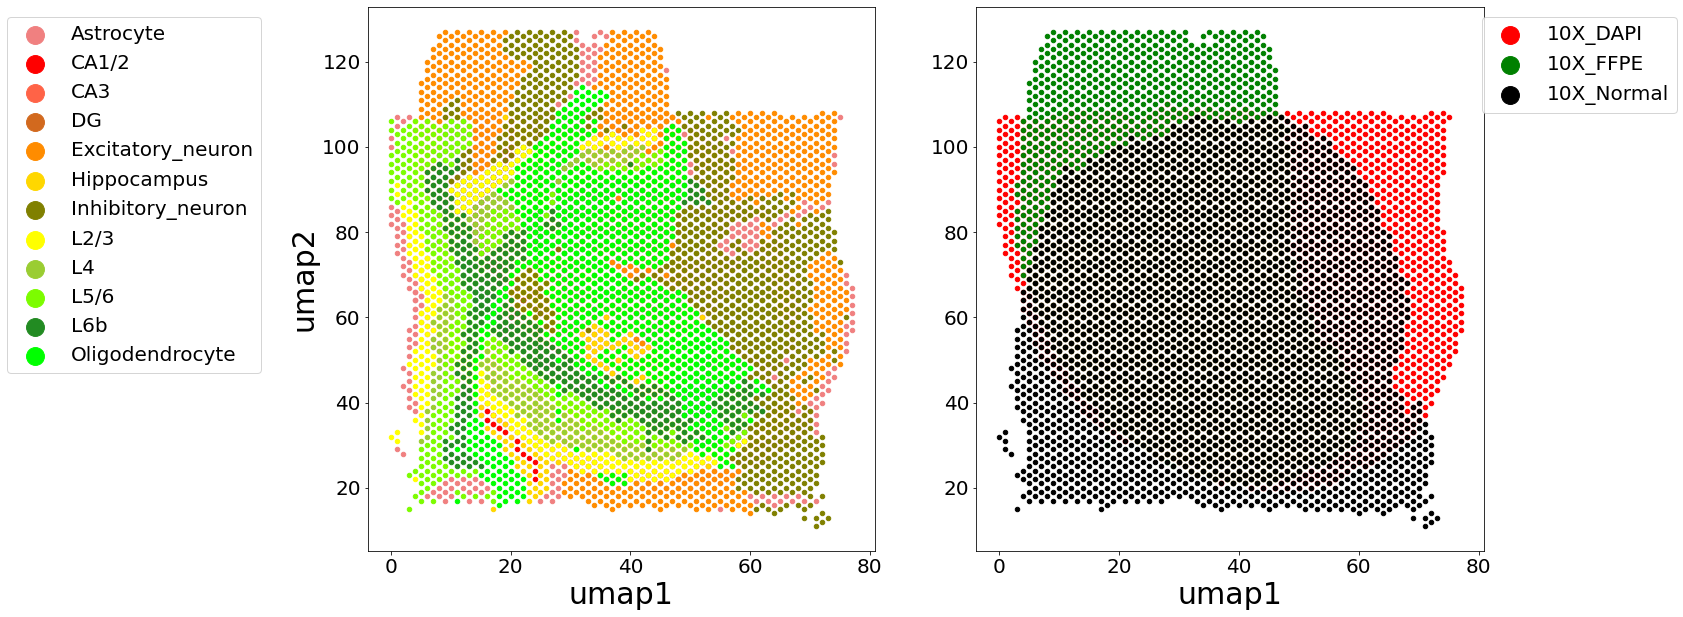

In [7]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype']),
                    np.array(new_slices[2].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs+[samples[2]]*feat3.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                    new_slices[2].obsm['spatial']))

umap_mat=np.vstack((feat1.obsm['spatial'],
                    feat2.obsm['spatial'],
                   feat3.obsm['spatial']))

colour1=['r','g','black','cyan','blue','purple','grey']
colour2=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

mouse OB

In [2]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
samples=["BGI","SlideV2"]
flags=""
for i in np.arange(len(samples)):
    flags=flags+"_"+samples[i]
feat1=sc.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[0]+"_mat.csv")
coord1=pd.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[0]+"_coord.csv",header=0,index_col=0,sep=',')
coord1=coord1.loc[:,['x','y']]
meta1=pd.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[0]+"_meta.csv",header=0,index_col=0,sep=',')
feat2=sc.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[1]+"_mat.csv")
coord2=pd.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[1]+"_coord.csv",header=0,index_col=0,sep=',')
coord2=coord2.loc[:,['x','y']]
meta2=pd.read_csv(dirs+"gtt_input/BGI_SlideV2_10X/"+samples[1]+"_meta.csv",header=0,index_col=0,sep=',')
feat1.obsm['spatial'] = coord1.values*60
feat1.obs['celltype']=meta1.loc[feat1.obs_names,'celltype'].values
feat2.obsm['spatial'] = coord2.values
feat2.obs['celltype']=meta2.loc[feat2.obs_names,'celltype'].values
pi12=pst.pairwise_align(feat1, feat2)
slices, pis = [feat1, feat2], [pi12]
new_slices = pst.stack_slices_pairwise(slices, pis)
new_slices[0].obs=meta1
new_slices[1].obs=meta2
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial']))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

# feat3=sc.read_csv(dirs+"gtt_input/"+samples[2]+"_mat.csv")
# coord3=pd.read_csv(dirs+"gtt_input/"+samples[2]+"_coord.csv",header=0,index_col=0,sep=',')
# coord3=coord3.loc[:,['x','y']]
# meta3=pd.read_csv(dirs+"gtt_input/"+samples[2]+"_meta.csv",header=0,index_col=0,sep=',')


# feat1.obsm['spatial'] = coord1.values*60
# feat1.obs['celltype']=meta1.loc[feat1.obs_names,'celltype'].values
# feat2.obsm['spatial'] = coord2.values
# feat2.obs['celltype']=meta2.loc[feat2.obs_names,'celltype'].values
# feat3.obsm['spatial'] = coord3.values
# feat3.obs['celltype']=meta3.loc[feat3.obs_names,'celltype'].values
# pi12=pst.pairwise_align(feat1, feat2)
# pi23=pst.pairwise_align(feat2, feat3)
# slices, pis = [feat1, feat2,feat3], [pi12,pi23]
# new_slices = pst.stack_slices_pairwise(slices, pis)
# new_slices[0].obs=meta1
# new_slices[1].obs=meta2
# new_slices[2].obs=meta3
# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial'],
#                     new_slices[2].obsm['spatial'],))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names))
# new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
# new_coord.to_csv(dirs+"methods/paste_new_coord"+flags+".csv")

Using selected backend cpu. If you want to use gpu, set use_gpu = True.


RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/tguo/tguo2/miniconda3/envs/PASTE/lib/python3.8/site-packages/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
RESULT MIGHT BE INAC

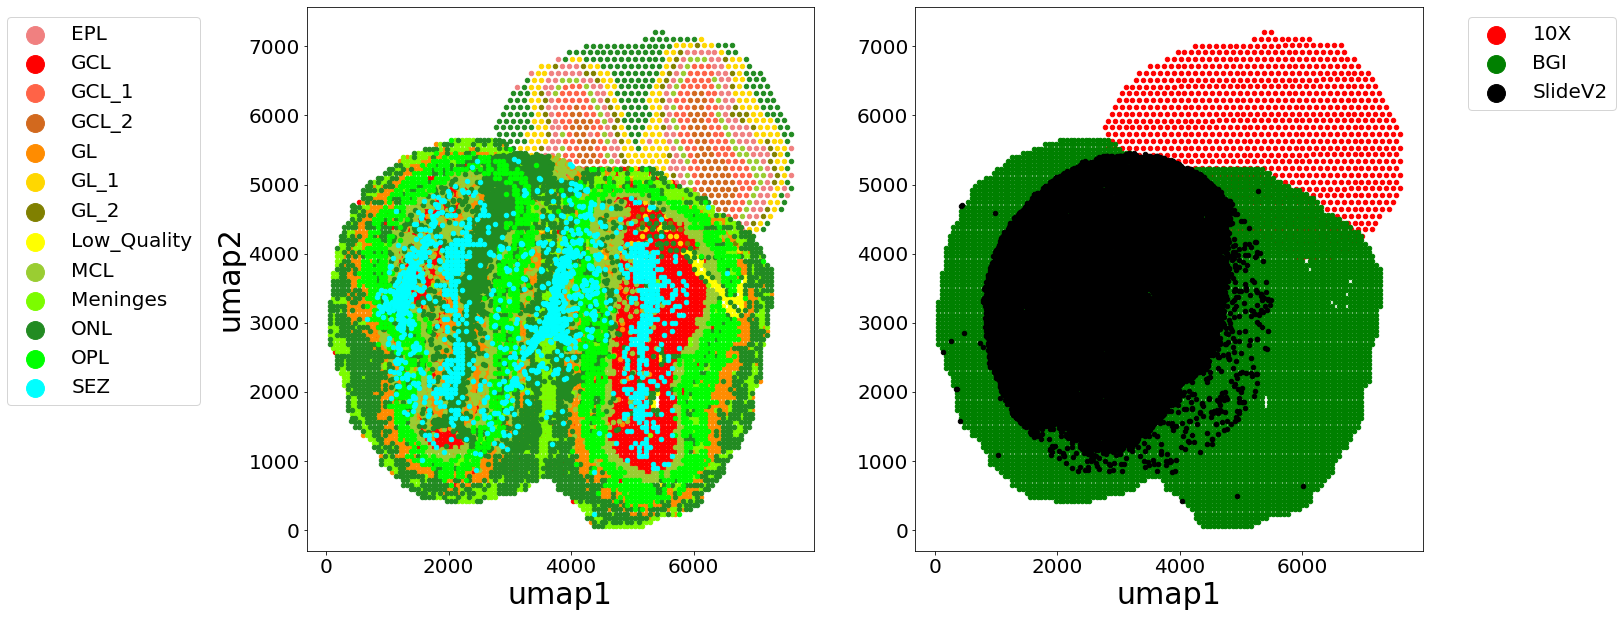

In [25]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=np.hstack((np.array(new_slices[0].obs['celltype']),
                    np.array(new_slices[1].obs['celltype']),
                    np.array(new_slices[2].obs['celltype'])))
ul=np.unique(celltype)
batch=np.array([samples[0]]*feat1.n_obs+[samples[1]]*feat2.n_obs+[samples[2]]*feat3.n_obs)
ub=np.unique(batch)
umap_mat=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                    new_slices[2].obsm['spatial']))

umap_mat=np.vstack((feat1.obsm['spatial'],
                    feat2.obsm['spatial'],
                   feat3.obsm['spatial']))

colour1=['r','g','black','cyan','blue','purple','grey']
colour2=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)